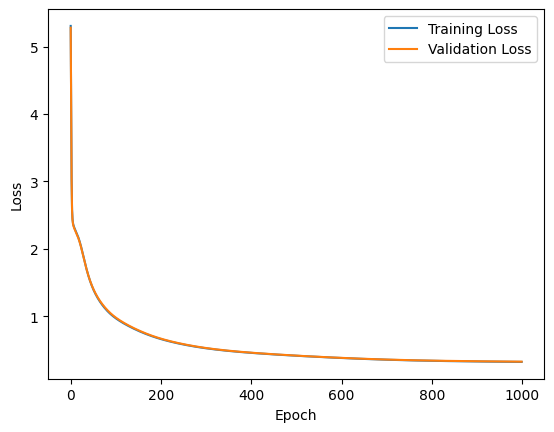

Average Training Error: 0.569612358102468
Average Validation Error: 0.5730150085709333


In [2]:
# Import dependencies
from nn import NeuralNetwork
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

digits = load_digits()  # Load the digits dataset
X, y = digits.data, digits.target  # Pass data and target values to variables X, y respectively

X /= 16  # Normalize the data

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Creatе an instance of the NeuralNetwork class with 64x16x64 autoencoder architecture
nn_arch = [{"input_dim": 64, "output_dim": 16, "activation": "relu"},
           {"input_dim": 16, "output_dim": 64, "activation": "sigmoid"}]

# Create an instance of the NeuralNetwork class with defined hyperparameters
nn = NeuralNetwork(nn_arch, lr=0.01, seed=42, batch_size=8, epochs=1000,
                   loss_function='mean squared error')

# Train the autoencoder
train_loss, val_loss = nn.fit(X_train, X_train, X_val, X_val)

# Plot training and validation loss by epoch
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

print(f'Average Training Error: {np.mean(train_loss)}')
print(f'Average Validation Error: {np.mean(val_loss)}')

# Hyperparameter choice rationale:

The input and output dimensions were selected to match the 64x16x64 autoencoder architecture. We constrain the dimensionality of the hidden layer to be less than the input layer so that the autoencoder can learn how to reconstruct the input layer data from fewer features. Since the autoencoder attempts to reconstruct the input layer data, the output layer has the same dimensionality as the input layer.

The learning rate lr is set to 0.01, since that seems to be a common choice for gradient descent optimization. Decreasing the learning rate would make training go slower, but also risks getting stuck at a local minimum. Conversely, increasing the learning rate would allow model training to proceed more quickly but risks divergent behavior.

The random seed is set to 42 because, according to the supercomputer Deep Thought, the number 42 is the "Answer to the Ultimate Question of Life, The Universe, and Everything."

The batch size is set to 8, because it seemed to be a reasonable size for this dataset and, by adjusting the batch size, I found that batch sizes under 20 seemed to have similar training loss and validation loss curves and were able to reach training and validation losses below 1 by the end of the epochs.

The number of epochs is set to 1000, but, given the loss curves, I think there is very little difference in accuracy between choosing to run the model for 400 epochs or 1000 epochs. One should take into account how computationally expensive running a model longer could be.